In [1]:
using Pkg
Pkg.activate("../STLCG.jl/.")

 Activating environment at `~/projects/AutonomousRiskFramework/STLCG.jl/Project.toml`


In [2]:
using Revise
using STLCG
using EllipsisNotation
using Plots

┌ Info: Precompiling STLCG [6ababdf7-4701-4f28-b3b2-5630f64e3c98]
└ @ Base loading.jl:1278
  ** incremental compilation may be fatally broken for this module **



## Short demo

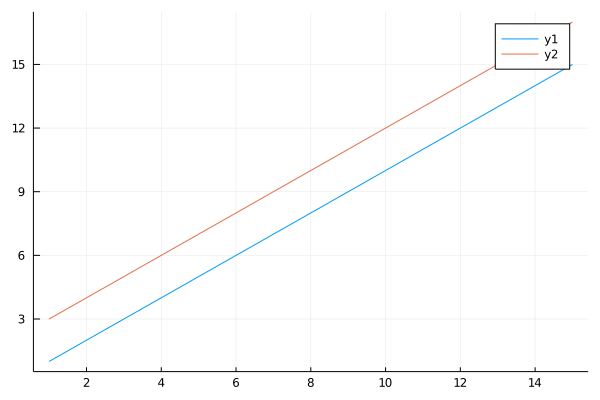

In [22]:
# setting up the signals
# Using very easy signals so we can compare with the correct answer
bs = 2
t = 15
x_dim = 3
dim = 2
x = Float32.(repeat(reshape(collect(1:t), 1, t, 1), bs, 1, x_dim))
y = Float32.(repeat(reshape(collect(1:t), 1, t, 1), bs, 1, x_dim)) .+ 2

plot(x[1,:,1])
plot!(y[1,:,1])

### Make some formulas

In [16]:
not = Negation(LessThan(:x, 4.0))
lt = LessThan(:x, 0.0)
gt = GreaterThan(:y, 0.0)
or = Or(subformula1=lt, subformula2=gt)
and = And(subformula1=lt, subformula2=gt)
alw = Always(subformula=and, interval=nothing)
ev = Eventually(subformula=or, interval=nothing)
ut = Until(subformula1=lt, subformula2=gt)

Until
  subformula1: LessThan
  subformula2: GreaterThan
  interval: Nothing nothing


In [5]:
# parameters: these are the default values, but feel free to change them here to test it out
pscale=1    # scale for LessThan, GreaterThan, Equal
scale=0     # scale for the minish and maxish function used in temporal operators, implies, and, or
keepdims=true      # keep original dimension (should pretty much always be true)
distributed=false  # if there are multiple indices that have the same max/min values, then mean over those to the gradient flows through all those values

false

### Evaluating robustness trace

In [6]:
ϕ = lt
ϕ(x; pscale, scale, keepdims, distributed)
# robustness_trace(ϕ, x; pscale, scale, keepdims, distributed)
ρt(ϕ, x; pscale, scale, keepdims, distributed)

2×15×3 Array{Float64,3}:
[:, :, 1] =
 -1.0  -2.0  -3.0  -4.0  -5.0  -6.0  …  -11.0  -12.0  -13.0  -14.0  -15.0
 -1.0  -2.0  -3.0  -4.0  -5.0  -6.0     -11.0  -12.0  -13.0  -14.0  -15.0

[:, :, 2] =
 -1.0  -2.0  -3.0  -4.0  -5.0  -6.0  …  -11.0  -12.0  -13.0  -14.0  -15.0
 -1.0  -2.0  -3.0  -4.0  -5.0  -6.0     -11.0  -12.0  -13.0  -14.0  -15.0

[:, :, 3] =
 -1.0  -2.0  -3.0  -4.0  -5.0  -6.0  …  -11.0  -12.0  -13.0  -14.0  -15.0
 -1.0  -2.0  -3.0  -4.0  -5.0  -6.0     -11.0  -12.0  -13.0  -14.0  -15.0

### Evaluating robustness $\rho$ (not trace)

In [18]:
ϕ = ut
# robustness(ϕ, x; pscale, scale, keepdims, distributed)
ρ(ϕ, (x,y); pscale, scale, keepdims, distributed)

2×1×3 Array{Float64,3}:
[:, :, 1] =
 -15.0
 -15.0

[:, :, 2] =
 -15.0
 -15.0

[:, :, 3] =
 -15.0
 -15.0

# Checking gradients
NOTE: Until and Then still suffering from mutating arrays

In [8]:
vcat(STLCG.gradient(x -> sum(ρ(ϕ, x; pscale, scale, keepdims, distributed)), x)...)

2×15×3 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

[:, :, 2] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

[:, :, 3] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

In [27]:
ϕ = alw
vcat(STLCG.gradient(x -> sum(ρ(ϕ, x; pscale, scale, keepdims, distributed)), (x,y))[1]...)

4×15×3 Array{Float64,3}:
[:, :, 1] =
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  …  -0.0  -0.0  -0.0  -0.0  -0.0  -1.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -1.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0

[:, :, 2] =
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  …  -0.0  -0.0  -0.0  -0.0  -0.0  -1.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -1.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0

[:, :, 3] =
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  …  -0.0  -0.0  -0.0  -0.0  -0.0  -1.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -1.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0